#                     Interactive and Transparent Machine Learning 

##                                                   Decision Trees 

### Dataset : World Happiness Report                                                                                                 Source: Kaggle.com

Description:
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. 
The dataset has 12 features and 157 objects.


In [1]:
# Loading the data
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\Prajakta\\2015.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
#Information about the data regarding features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [4]:
#Converting feature 'Happiness score' from float to integer 
df['Happiness Score'] = df['Happiness Score'].astype(int)
df['Happiness Score']

0      7
1      7
2      7
3      7
4      7
5      7
6      7
7      7
8      7
9      7
10     7
11     7
12     7
13     7
14     7
15     6
16     6
17     6
18     6
19     6
20     6
21     6
22     6
23     6
24     6
25     6
26     6
27     6
28     6
29     6
      ..
128    4
129    4
130    4
131    4
132    4
133    4
134    4
135    4
136    4
137    3
138    3
139    3
140    3
141    3
142    3
143    3
144    3
145    3
146    3
147    3
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    2
157    2
Name: Happiness Score, dtype: int32

In [5]:
#Taking all the features in one list and removing the features that are not required as they are unique and in text format
features = list(df)
features.remove('Happiness Score')
features.remove('Happiness Rank')
features.remove('Country') 
features.remove('Region')
features

['Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

#                                          Decision Tree Classifier

##                                                         Depth = 1

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
y = df['Happiness Score']              # Target Feature
X = df[features]                       # Remaining Features 

# Training Data = 2/3 and Test Data = 1/3 respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66,test_size=0.33,random_state=101)
dt = DecisionTreeClassifier(max_depth=1,criterion = 'entropy')  
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
# Visualization of the tree and deriving important features according to the Information Gain 

def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")

visualize_tree(dt, features)

#This gives a word file named dt.docx where the nodes are splitted according to the entropy. The tree looks like below: 

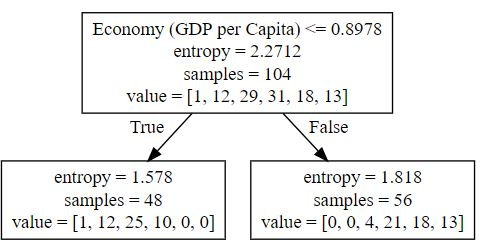

In [8]:
from IPython.display import Image
Image(filename='C:\\Users\\Prajakta\\tree_depth_1.jpg')

In [9]:
# Accuracy on Train data
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_train)
accuracy_dt =  accuracy_score(y_train,y_pred)*100
print('Accuracy: ', accuracy_dt)


Accuracy:  44.2307692308


In [21]:
from sklearn.metrics import precision_score, recall_score
precision_dt = precision_score(y_train,y_pred,average='weighted')*100
print('Precision: ', precision_dt)
recall_dt = recall_score(y_train,y_pred,average='weighted')*100
print('Recall: ', recall_dt)

Precision:  25.7011217949
Recall:  44.2307692308


C:\Users\Prajakta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# Accuracy on Test data

from sklearn.metrics import accuracy_score
y_pred_test = dt.predict(X_test)
accuracy_dt_test =  accuracy_score(y_test,y_pred_test)*100
print('Accuracy: ', accuracy_dt_test)


Accuracy:  37.7358490566


In [50]:
# Finding important features for depth = 1
wf= zip(dt.feature_importances_, features)
sorted(wf, reverse=True)

[(1.0, 'Economy (GDP per Capita)'),
 (0.0, 'Trust (Government Corruption)'),
 (0.0, 'Standard Error'),
 (0.0, 'Health (Life Expectancy)'),
 (0.0, 'Generosity'),
 (0.0, 'Freedom'),
 (0.0, 'Family'),
 (0.0, 'Dystopia Residual')]

##                                                                    Depth = 2

In [22]:
dt_depth2 = DecisionTreeClassifier(max_depth=2,criterion = 'entropy')  
dt_depth2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
visualize_tree(dt_depth2, features)

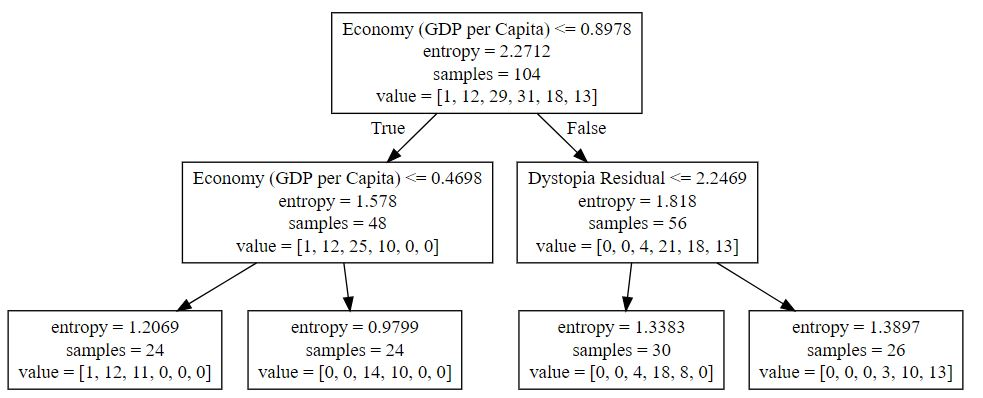

In [24]:
Image(filename='C:\\Users\\Prajakta\\tree_depth_2.jpg')

In [26]:
# Accuracy on Train data
from sklearn.metrics import accuracy_score
y_pred_depth2 = dt_depth2.predict(X_train)
accuracy_dt_trainD2 =  accuracy_score(y_train,y_pred_depth2)*100
print('Accuracy: ', accuracy_dt_trainD2)


Accuracy:  54.8076923077


In [27]:
from sklearn.metrics import precision_score, recall_score
precision_dt_D2 = precision_score(y_train,y_pred_depth2,average='weighted')*100
print('Precision: ', precision_dt_D2)
recall_dt_D2 = recall_score(y_train,y_pred_depth2,average='weighted')*100
print('Recall: ', recall_dt_D2)

Precision:  46.1698717949
Recall:  54.8076923077


C:\Users\Prajakta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# Accuracy on Test data

from sklearn.metrics import accuracy_score
y_pred_testD2 = dt_depth2.predict(X_test)
accuracy_dt_testD2 =  accuracy_score(y_test,y_pred_testD2)*100
print('Accuracy: ', accuracy_dt_testD2)


Accuracy:  32.0754716981


In [49]:
# Finding important features for depth = 2
wf= zip(dt_depth2.feature_importances_, features)
sorted(wf, reverse=True)

[(0.76238179343324486, 'Economy (GDP per Capita)'),
 (0.23761820656675506, 'Dystopia Residual'),
 (0.0, 'Trust (Government Corruption)'),
 (0.0, 'Standard Error'),
 (0.0, 'Health (Life Expectancy)'),
 (0.0, 'Generosity'),
 (0.0, 'Freedom'),
 (0.0, 'Family')]

##                                                               Depth = 3

In [29]:
dt_depth3 = DecisionTreeClassifier(max_depth=3,criterion = 'entropy')  
dt_depth3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
visualize_tree(dt_depth3, features)

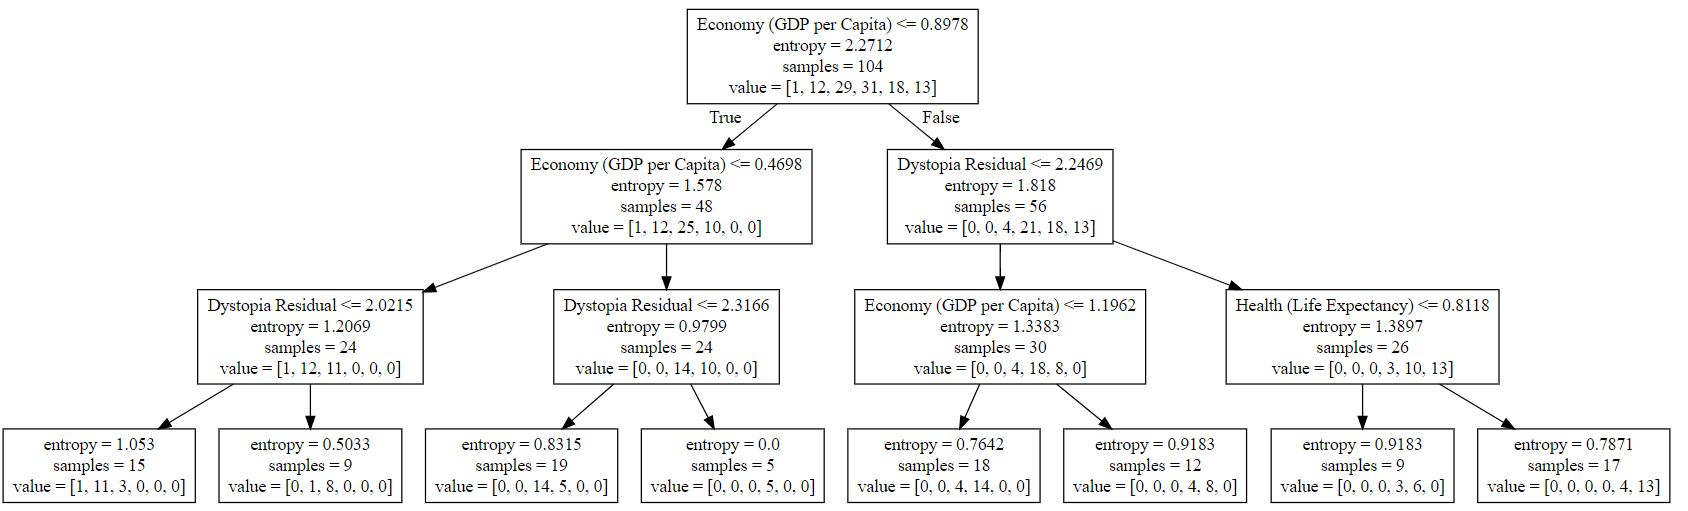

In [32]:
Image(filename='C:\\Users\\Prajakta\\tree_depth_3.jpg')

In [33]:
# Accuracy on Train data
from sklearn.metrics import accuracy_score
y_pred_depth3 = dt_depth3.predict(X_train)
accuracy_dt_trainD3 =  accuracy_score(y_train,y_pred_depth3)*100
print('Accuracy: ', accuracy_dt_trainD3)

Accuracy:  75.9615384615


In [34]:
from sklearn.metrics import precision_score, recall_score
precision_dt_D3 = precision_score(y_train,y_pred_depth3,average='weighted')*100
print('Precision: ', precision_dt_D3)
recall_dt_D3 = recall_score(y_train,y_pred_depth3,average='weighted')*100
print('Recall: ', recall_dt_D3)

Precision:  76.0919100082
Recall:  75.9615384615


C:\Users\Prajakta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
# Accuracy on Test data

from sklearn.metrics import accuracy_score
y_pred_testD3 = dt_depth3.predict(X_test)
accuracy_dt_testD3 =  accuracy_score(y_test,y_pred_testD3)*100
print('Accuracy: ', accuracy_dt_testD3)


Accuracy:  58.4905660377


In [48]:
# Finding important features for depth = 3
wf= zip(dt_depth3.feature_importances_, features)
sorted(wf, reverse=True)

[(0.63310823298753849, 'Economy (GDP per Capita)'),
 (0.27261869662425597, 'Dystopia Residual'),
 (0.094273070388205468, 'Health (Life Expectancy)'),
 (0.0, 'Trust (Government Corruption)'),
 (0.0, 'Standard Error'),
 (0.0, 'Generosity'),
 (0.0, 'Freedom'),
 (0.0, 'Family')]

##                                                                Depth = 4

In [36]:
dt_depth4 = DecisionTreeClassifier(max_depth=4,criterion = 'entropy')  
dt_depth4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [37]:
# Accuracy on Train data
from sklearn.metrics import accuracy_score
y_pred_depth4 = dt_depth4.predict(X_train)
accuracy_dt_trainD4 =  accuracy_score(y_train,y_pred_depth4)*100
print('Accuracy: ', accuracy_dt_trainD4)

Accuracy:  88.4615384615


In [38]:
# Accuracy on Test data

from sklearn.metrics import accuracy_score
y_pred_testD4 = dt_depth4.predict(X_test)
accuracy_dt_testD4 =  accuracy_score(y_test,y_pred_testD4)*100
print('Accuracy: ', accuracy_dt_testD4)


Accuracy:  54.7169811321


In [47]:
# Finding important features for depth = 4
wf= zip(dt_depth4.feature_importances_, features)
sorted(wf, reverse=True)

[(0.531009882241678, 'Economy (GDP per Capita)'),
 (0.21185326347289921, 'Dystopia Residual'),
 (0.10504229810134942, 'Freedom'),
 (0.10112514002927905, 'Health (Life Expectancy)'),
 (0.025583580150137068, 'Family'),
 (0.025385836004657394, 'Trust (Government Corruption)'),
 (0.0, 'Standard Error'),
 (0.0, 'Generosity')]

##                                                              Depth = 5

In [39]:
dt_depth5 = DecisionTreeClassifier(max_depth=5,criterion = 'entropy')  
dt_depth5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [40]:
# Accuracy on Train data
from sklearn.metrics import accuracy_score
y_pred_depth5 = dt_depth5.predict(X_train)
accuracy_dt_trainD5 =  accuracy_score(y_train,y_pred_depth5)*100
print('Accuracy: ', accuracy_dt_trainD5)

Accuracy:  97.1153846154


In [41]:
# Accuracy on Test data

from sklearn.metrics import accuracy_score
y_pred_testD5 = dt_depth5.predict(X_test)
accuracy_dt_testD5 =  accuracy_score(y_test,y_pred_testD5)*100
print('Accuracy: ', accuracy_dt_testD5)


Accuracy:  66.0377358491


In [46]:
# Finding important features for depth = 5
wf= zip(dt_depth5.feature_importances_, features)
sorted(wf, reverse=True)

[(0.44269134511293495, 'Economy (GDP per Capita)'),
 (0.25171985419313253, 'Dystopia Residual'),
 (0.114913871514921, 'Freedom'),
 (0.088054572426662342, 'Health (Life Expectancy)'),
 (0.042222734469949612, 'Family'),
 (0.033975316655742396, 'Trust (Government Corruption)'),
 (0.026422305626657219, 'Standard Error'),
 (0.0, 'Generosity')]

##                                                               Depth = 6

In [42]:
dt_depth6= DecisionTreeClassifier(max_depth=6,criterion = 'entropy')  
dt_depth6.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [43]:
# Accuracy on Train data
from sklearn.metrics import accuracy_score
y_pred_depth6 = dt_depth6.predict(X_train)
accuracy_dt_trainD6 =  accuracy_score(y_train,y_pred_depth6)*100
print('Accuracy: ', accuracy_dt_trainD6)

Accuracy:  100.0


In [44]:
# Accuracy on Test data

from sklearn.metrics import accuracy_score
y_pred_testD6 = dt_depth6.predict(X_test)
accuracy_dt_testD6 =  accuracy_score(y_test,y_pred_testD6)*100
print('Accuracy: ', accuracy_dt_testD6)


Accuracy:  58.4905660377


In [45]:
# Finding important features for depth = 6
wf= zip(dt_depth6.feature_importances_, features)
sorted(wf, reverse=True)

[(0.41186073471804102, 'Economy (GDP per Capita)'),
 (0.25094761126305087, 'Dystopia Residual'),
 (0.10607167129784591, 'Health (Life Expectancy)'),
 (0.10296475421751372, 'Freedom'),
 (0.053914814540025273, 'Trust (Government Corruption)'),
 (0.029662460794659447, 'Generosity'),
 (0.025402171429169625, 'Standard Error'),
 (0.019175781739694087, 'Family')]

#                                                    Conclusion

The goal of a decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this dataset, as I increased the depth of the decision tree i.e increased the number of features, the accuracy started increasing.

Taking entropy as a splitting criterion, I used various depths for measuring the accuracy of train and test data and after 6 experiments, at depth = 6, the accuracy of training data was 100% and testing data was 58.4% which is the highest.

The 100 % accuracy in training data simply means that this is OVERFITTING, model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

Also, I calculated the feature importances using following:
Criteria for features selection: featureimportances : array of shape = [n_features] The feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. Therefore, the most important feature in this data is Economy (GDP per Capita) that affects the Happiness Score most followed by 'Dystopia Residual','Health (Life Expectancy)'and so on.
